In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Reading dataset

In [4]:
data= pd.read_csv('healthcare-dataset-stroke-data.csv')

df= data

## Quick view on the dataset

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.sample(1).iloc[0]

id                     48609
gender                Female
age                     81.0
hypertension               0
heart_disease              1
ever_married             Yes
work_type            Private
Residence_type         Rural
avg_glucose_level     123.49
bmi                     30.7
smoking_status        smokes
stroke                     0
Name: 1511, dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# EDA 

## EDA for categorical features

In [9]:
heart_disval={
    0:'no',
    1:'yes'
}

stroke_val={
    0:'no',
    1:'yes'
}

hypertension_val={
    0:"no",
    1:'yes'
}

In [10]:
df.heart_disease= df.heart_disease.map(heart_disval)
df.stroke=df.stroke.map(stroke_val)
df.hypertension=df.hypertension.map(hypertension_val)

In [11]:
df.columns=df.columns.str.lower()

In [12]:
categorical=['gender','hypertension','heart_disease','ever_married','work_type','residence_type','smoking_status']

In [13]:
from sklearn.metrics import mutual_info_score
df_used=df.copy()
mutual_info_score(df.stroke, df.smoking_status)

0.002750494543529103

In [14]:
df_used['stroke']=(df_used.stroke=='yes').astype('int')

In [15]:
def mutual_informations(series):
    return mutual_info_score(df_used.stroke,series)

In [17]:
global_stroke_rate=round(df_used.stroke.mean(),6)

print(global_stroke_rate)

0.048728


### calculating the stroke risk for each group, and the risk ratio  

In [18]:
from IPython.display import display

for c in categorical: 
    print(c)
    
    df_group = df_used.groupby(by= c).stroke.agg(['count', 'mean'])

    df_group['diff']= df_group['mean']- global_stroke_rate

    df_group['risk_ratio']= df_group['mean']/global_stroke_rate
    
    display(df_group)
    
    print()
    print()

gender


,count,mean,diff,risk_ratio
gender,,,,
Female,2994,0.047094,-0.001634,0.966471
Male,2115,0.051064,0.002336,1.047936
Other,1,0.000000,-0.048728,0.000000




hypertension


,count,mean,diff,risk_ratio
hypertension,,,,
no,4612,0.039679,-0.009049,0.814298
yes,498,0.132530,0.083802,2.719794




heart_disease


,count,mean,diff,risk_ratio
heart_disease,,,,
no,4834,0.041787,-0.006941,0.857563
yes,276,0.170290,0.121562,3.494702




ever_married


,count,mean,diff,risk_ratio
ever_married,,,,
No,1757,0.016505,-0.032223,0.338725
Yes,3353,0.065613,0.016885,1.346513




work_type


,count,mean,diff,risk_ratio
work_type,,,,
Govt_job,657,0.050228,0.001500,1.030789
Never_worked,22,0.000000,-0.048728,0.000000
Private,2925,0.050940,0.002212,1.045398
Self-employed,819,0.079365,0.030637,1.628737
children,687,0.002911,-0.045817,0.059744




residence_type


,count,mean,diff,risk_ratio
residence_type,,,,
Rural,2514,0.045346,-0.003382,0.930596
Urban,2596,0.052003,0.003275,1.067211




smoking_status


,count,mean,diff,risk_ratio
smoking_status,,,,
Unknown,1544,0.030440,-0.018288,0.624701
formerly smoked,885,0.079096,0.030368,1.623216
never smoked,1892,0.047569,-0.001159,0.976209
smokes,789,0.053232,0.004504,1.092430


### calculating the mutual_information

In [19]:
mi_categorical_columns= df_used[categorical].apply(mutual_informations)
    
mi_categorical_columns.sort_values(ascending=False)

ever_married      0.006950
work_type         0.006825
hypertension      0.005976
heart_disease     0.005897
smoking_status    0.002750
residence_type    0.000120
gender            0.000051
dtype: float64

## EDA for numerical features

In [20]:
numerical=['age','avg_glucose_level','bmi']

### Checking for nan values

In [21]:
for col in numerical:
    print(col)
    print(df[df[col].isnull()])
    print('------------------')
    print()

age
Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []
------------------

avg_glucose_level
Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []
------------------

bmi
         id  gender   age hypertension heart_disease ever_married  \
1     51676  Female  61.0           no            no          Yes   
8     27419  Female  59.0           no            no          Yes   
13     8213    Male  78.0           no           yes          Yes   
19    25226    Male  57.0           no           yes           No   
27    61843    Male  58.0           no            no          Yes   
...     ...     ...   ...          ...           ...          ...   
5039  42007    Male  41.0           no            no           No   
5048  28788    Male  40.0           no  

### Calculate the co-relation

In [22]:
df_used[numerical].corrwith(df_used.stroke)

age                  0.245257
avg_glucose_level    0.131945
bmi                  0.042374
dtype: float64

<AxesSubplot:>

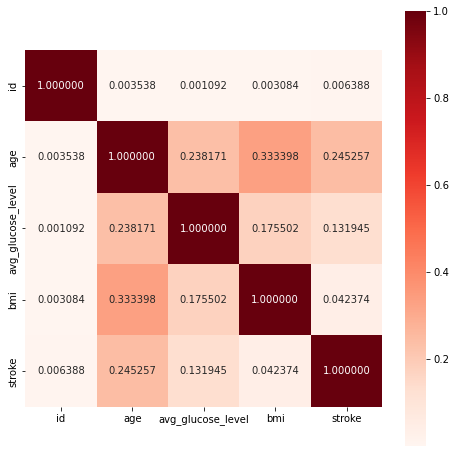

In [23]:
corr = df_used.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,cbar=True,square=True,fmt='.6f',annot=True,cmap='Reds')

### Chosen features

In [24]:
numerical_chosen=['age','avg_glucose_level']
categorical_chosen=['hypertension','heart_disease','smoking_status']

In [25]:
del df_used['id']

# Training,validation and testing steps

### spliting our dataset

In [26]:
df_full_train, df_test= train_test_split(df_used, test_size= 0.2, random_state= 1 )

In [27]:
df_train, df_val= train_test_split(df_full_train, test_size= 0.25, random_state=1)

In [28]:
df_train= df_train.reset_index(drop= True)

df_val= df_val.reset_index(drop=True)

df_test=df_test.reset_index(drop=True)

In [29]:
df_train

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,45.0,no,no,Yes,Private,Rural,65.48,26.6,Unknown,0
1,Male,39.0,no,no,Yes,Self-employed,Urban,74.29,29.3,smokes,0
2,Female,74.0,no,no,Yes,Govt_job,Urban,111.94,21.7,never smoked,0
3,Female,72.0,no,no,Yes,Self-employed,Urban,103.78,32.7,formerly smoked,0
4,Female,28.0,no,no,Yes,Private,Rural,64.64,22.1,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
3061,Female,14.0,no,no,No,children,Urban,63.74,22.4,Unknown,0
3062,Female,81.0,yes,no,Yes,Private,Urban,58.71,34.5,never smoked,0
3063,Female,49.0,yes,no,Yes,Govt_job,Rural,63.16,23.3,formerly smoked,0
3064,Male,54.0,no,no,Yes,Private,Urban,65.69,21.4,never smoked,0


In [30]:
y_train=df_train.stroke.values
y_val=df_val.stroke.values
y_test=df_test.stroke.values


In [31]:
del df_train['stroke']
del df_test['stroke']
del df_val['stroke']

### functions for extracting features


In [32]:
def train_feat_extr(df):
    dicts_train = df[categorical_chosen+numerical_chosen].to_dict(orient='records')
    dv= DictVectorizer(sparse=False)
    X_train= dv.fit_transform(dicts_train)
    y_train= df.stroke.values
    
    return X_train, y_train,dv

def pred_feat_etr(df,dv):
    dicts_val = df[categorical_chosen+numerical_chosen].to_dict(orient='records')
    X_val= dv.transform(dicts_val)
    
    return X_val

### Random forest 

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [34]:
df_train.dtypes

gender                object
age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
dtype: object

In [35]:
dict_train=df_train[numerical_chosen+categorical_chosen].to_dict(orient='records')
dict_val=df_val[numerical_chosen+categorical_chosen].to_dict(orient='records')
dict_test=df_test[numerical_chosen+categorical_chosen].to_dict(orient='records')

In [36]:
dv=DictVectorizer(sparse=False)
x_train=dv.fit_transform(dict_train)
x_val=dv.transform(dict_val)
x_test=dv.transform(dict_test)

### Cross-validation

In [37]:
from sklearn.model_selection import KFold

In [38]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

rf_auc_scores= []

for train_idx, val_idx in kfold.split(df_full_train):
    df_trainrf = df_full_train.iloc[train_idx]
    
    df_valrf= df_full_train.iloc[val_idx]
    x_trainrf, y_trainrf, dvrf= train_feat_extr(df_trainrf)
    y_valrf= df_valrf.stroke.values
    x_valrf= pred_feat_etr(df_valrf, dvrf)
    modelrf = RandomForestClassifier(n_estimators=100)
    modelrf.fit(x_trainrf, y_trainrf)
    y_predrf = modelrf.predict_proba(x_valrf)[:, 1]
    aucrf = roc_auc_score(y_valrf,y_predrf)
    
    rf_auc_scores.append(aucrf)
    
    print("mean: %.3f & std : %.3f " %(np.mean(rf_auc_scores),np.std(rf_auc_scores)))

mean: 0.762 & std : 0.000 
mean: 0.738 & std : 0.024 
mean: 0.756 & std : 0.032 
mean: 0.739 & std : 0.040 
mean: 0.743 & std : 0.036 


### Logistic regression 

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
df_full_train

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
4152,Male,55.0,no,no,Yes,Self-employed,Rural,73.57,28.0,smokes,0
4051,Male,55.0,no,no,Yes,Govt_job,Urban,231.15,22.3,never smoked,0
5076,Female,34.0,no,no,Yes,Private,Rural,174.37,23.0,never smoked,0
874,Male,80.0,no,no,Yes,Private,Rural,56.99,26.7,never smoked,0
3534,Female,61.0,no,no,Yes,Private,Urban,108.18,19.1,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
2895,Male,46.0,no,no,Yes,Private,Urban,137.77,29.3,never smoked,0
2763,Female,45.0,no,no,Yes,Private,Rural,63.73,32.0,Unknown,0
905,Female,31.0,no,no,Yes,Private,Rural,76.26,35.6,never smoked,0
3980,Female,45.0,no,no,Yes,Private,Rural,218.10,55.0,smokes,0


In [41]:
def train_logistic(df):
    dicts_train = df[categorical_chosen+numerical_chosen].to_dict(orient='records')
    dv= DictVectorizer(sparse=False)
    X_train= dv.fit_transform(dicts_train)
    y_train= df.stroke.values
    model= LogisticRegression(solver='liblinear', C=1.0, max_iter= 1000)
    model.fit(X_train, y_train)
    
    return X_train, y_train,dv, model

In [42]:
def predicition_logistic(df,dv, model):
    dicts_val = df[categorical_chosen+numerical_chosen].to_dict(orient='records')
    X_val= dv.transform(dicts_val)
    y_predict= model.predict_proba(X_val)
    
    return y_predict

### cross-validation

In [43]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

auc_scores= []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train2 = df_full_train.iloc[train_idx]
    
    df_val2= df_full_train.iloc[val_idx]
    X_train2, y_train2, dv, model_log2= train_logistic(df_train2)
    y_val2= df_val2.stroke.values
    
    y_predict6= predicition_logistic(df_val2, dv, model_log2)
    
    y_predict6 = y_predict6[:,1] 
    
    auc = roc_auc_score(y_val2,y_predict6)
    
    auc_scores.append(auc)
    
    print("mean: %.3f & std : %.3f " %(np.mean(auc_scores),np.std(auc_scores)))

mean: 0.818 & std : 0.000 
mean: 0.831 & std : 0.012 
mean: 0.835 & std : 0.012 
mean: 0.829 & std : 0.014 
mean: 0.829 & std : 0.012 


In [44]:
X_train5, y_train5, dv5, model_log5= train_logistic(df_full_train)
y_predict9= predicition_logistic(df_test, dv5, model_log5)
    
y_predict9 = y_predict9[:,1] 
    
roc_auc_score(y_test,y_predict9)
    

0.8647609147609148

## XGboost

In [51]:
import xgboost as xgb

In [52]:
dtrain = xgb.DMatrix(x_train, label=y_train, feature_names=dv.feature_names_)
dval = xgb.DMatrix(x_val, label=y_val, feature_names=dv.feature_names_)
dtest = xgb.DMatrix(x_test, label=y_test, feature_names=dv.feature_names_)

### XGboost parameters

In [54]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1,
    'verbosity': 0
}

### Cross-validation

In [57]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

xg_auc_scores= []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train3 = df_full_train.iloc[train_idx]
    
    df_val3= df_full_train.iloc[val_idx]
    x_train3, y_train3, dv2= train_feat_extr(df_train3)
    y_val3= df_val3.stroke.values
    x_val3= pred_feat_etr(df_val3, dv2)
    dtrain2 = xgb.DMatrix(x_train3, label=y_train3, feature_names=dv2.feature_names_)
    dval2 = xgb.DMatrix(x_val3, label=y_val3, feature_names=dv2.feature_names_)
    
    model2 = xgb.train(xgb_params, dtrain2, num_boost_round=10)
    y_predxg2 = model2.predict(dval2)
    auc2 = roc_auc_score(y_val3,y_predxg2)
    
    xg_auc_scores.append(auc2)
    
    print("mean: %.3f & std : %.3f " %(np.mean(xg_auc_scores),np.std(xg_auc_scores)))

mean: 0.827 & std : 0.000 
mean: 0.817 & std : 0.009 
mean: 0.821 & std : 0.009 
mean: 0.818 & std : 0.009 
mean: 0.812 & std : 0.015 


In [58]:
x_train6, y_train6, dv9= train_feat_extr(df_full_train)
dtrain6 = xgb.DMatrix(x_train6, label=y_train6, feature_names=dv9.feature_names_)
model6 = xgb.train(xgb_params, dtrain6, num_boost_round=10)
y_predxg6 = model6.predict(dtest)
roc_auc_score(y_test,y_predxg6)

0.848639986139986

# saving the selected model 

In [60]:
import pickle

In [61]:
output_file = f'modellog5.bin'

output_file

'modellog5.bin'

In [62]:
f_out=open(output_file,'wb')

pickle.dump((dv5, model_log5),f_out)

f_out.close()